In [19]:
import torch
import torch.nn as nn
tensor = torch.tensor(4.)
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [8]:
t2 = torch.tensor([4.0,1,2,3,5])
t2.shape

torch.Size([5])

In [9]:
t2

tensor([4., 1., 2., 3., 5.])

In [7]:
print(t2.tolist())

[4, 1, 2, 3, 5]


In [10]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [16]:
input = torch.randn(3)
print(input)

tensor([-1.3884,  0.4291,  0.4750])


In [17]:
output = torch.sigmoid(input)

print(output)

tensor([0.1997, 0.6057, 0.6166])


In [22]:
m = nn.ReLU() 

input = torch.randn(2) 
print(input) 

tensor([ 1.2007, -0.6231])


In [23]:
output = m(input) 
print(output)

tensor([1.2007, 0.0000])


In [41]:
import torch
import torchvision

from torchvision.datasets import MNIST
from torchvision import transforms

from torch.utils.data.dataloader import DataLoader # Creating Batches

# import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd

# import torch.nn as nn
# import torch.nn.functional as func
# import torch.optim as optim

# from torchvision import models
# from torchsummary import summary


In [34]:
datatensor = MNIST(root='data/',download=True,transform = transforms.ToTensor())
testtensor = MNIST(root='data/',download=True,train=False,transform = transforms.ToTensor())

In [35]:
image,label = datatensor[0]
print(image.shape,label)

torch.Size([1, 28, 28]) 5


In [45]:
image.shape

torch.Size([1, 28, 28])

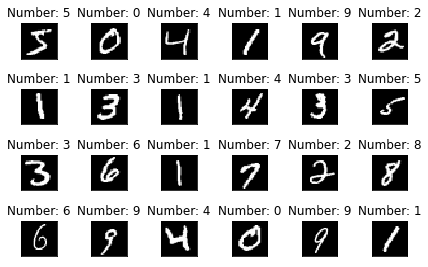

In [39]:
for i in range(24):
  image,label=datatensor[i]
  plt.subplot(4,6,i+1)
  plt.tight_layout()
  plt.imshow(image[0], cmap='gray', interpolation='none')
  plt.title(f"Number: {label}")
  plt.xticks([])
  plt.yticks([])

## Split Data

In [40]:
train_set, val_set = torch.utils.data.random_split(datatensor, [50000, 10000])

## Creating Batches

In [42]:
batch_size = 100

train_loader = DataLoader(train_set,batch_size) 
val_loader = DataLoader(val_set,batch_size)

In [47]:
#model = nn.Linear(784, 10)

class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Add more Hidden Layers
        
        self.l1 = nn.Linear(784,10)

    def forward(self,data):
        data = data.reshape(-1,784)
        
        output = self.l1(data)

        return output

model = MnistModel()

In [50]:
loss = nn.CrossEntropyLoss()

In [51]:
epochs = 3

In [52]:
for epoch in range(1,epochs+1):
    
    for images, labels in train_loader:
        
        # Logarithmic Values - Unnormalized Probabilities
        logits = model(images)
        
        # Capturing the Loss in the Model
        loss_obj = loss(logits,labels)
        

## Test the Model

In [53]:
test_batch_size = 100
test_loader = DataLoader(testtensor,test_batch_size)

In [72]:
for images, labels in test_loader:
    with torch.no_grad():
        output = model(images)
        break

## Plot the Prediction

In [88]:
output.max(1)[1][0].item()

0

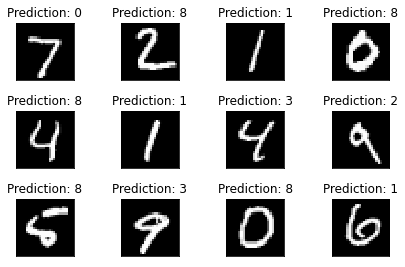

In [89]:
fig = plt.figure()
for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(images[i][0], cmap='gray', interpolation='none')
  plt.title(f"Prediction: {output.max(1)[1][i].item()}")

  plt.xticks([])
  plt.yticks([])